In [1]:
import os
import sys
sys.path.append(os.pardir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from my_lib.utils import shuffle_dataset
from my_lib.net import MultiLayerNet
from my_lib.trainer import Trainer

In [3]:
(x_train, y_train), (x_test, y_test) = load_mnist()
x_train, y_train = shuffle_dataset(x_train, y_train)
val_rate = 0.2
val_num = int(x_train.shape[0] * val_rate)

x_val = x_train[:val_num]
y_val = y_train[:val_num]
x_train = x_train[val_num:]
y_train = y_train[val_num:]

In [4]:
def __train(lr, weight_decay, epochs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, y_train, x_val, y_val,
                      epochs=epochs, batch_size=100,
                      optimizer="sgd", optimizer_param={"lr": lr}, verbose=0)
    trainer.train()
    return trainer.train_acc_list, trainer.test_acc_list

In [5]:
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    train_acc_list, val_acc_list = __train(lr, weight_decay)
    print(f"val acc : {val_acc_list[-1]:.5f} | lr : {lr:.10f}, weight decay : {weight_decay:.10f}")
    key = f"lr : {lr}, weight decay : {weight_decay}"
    results_train[key] = train_acc_list
    results_val[key] = val_acc_list

val acc : 0.93417 | lr : 0.0005705709, weight decay : 0.0000004842
val acc : 0.94450 | lr : 0.0008380064, weight decay : 0.0000202138
val acc : 0.91492 | lr : 0.0003250852, weight decay : 0.0000039668
val acc : 0.92408 | lr : 0.0003812512, weight decay : 0.0000018274
val acc : 0.96758 | lr : 0.0049855968, weight decay : 0.0000003415
val acc : 0.91000 | lr : 0.0002800968, weight decay : 0.0000001594
val acc : 0.97092 | lr : 0.0097857504, weight decay : 0.0000002990
val acc : 0.96733 | lr : 0.0032464042, weight decay : 0.0000007969
val acc : 0.96892 | lr : 0.0058342263, weight decay : 0.0000000379
val acc : 0.96808 | lr : 0.0034810413, weight decay : 0.0000004752
val acc : 0.12600 | lr : 0.0000015584, weight decay : 0.0000000369
val acc : 0.08942 | lr : 0.0000012615, weight decay : 0.0000002007
val acc : 0.96433 | lr : 0.0026582848, weight decay : 0.0000000698
val acc : 0.94142 | lr : 0.0007363807, weight decay : 0.0000021942
val acc : 0.94325 | lr : 0.0008489697, weight decay : 0.000000

Best 1 (val acc : 0.97142) | lr : 0.006848814760588589, weight decay : 4.54037256683708e-07
Best 2 (val acc : 0.97142) | lr : 0.00538019161233057, weight decay : 5.395126430037468e-07
Best 3 (val acc : 0.97092) | lr : 0.009785750393570347, weight decay : 2.9901872585315125e-07
Best 4 (val acc : 0.97083) | lr : 0.0064617182769365795, weight decay : 6.979760277840182e-08
Best 5 (val acc : 0.96908) | lr : 0.006834169616379174, weight decay : 5.55930023668981e-05
Best 6 (val acc : 0.96892) | lr : 0.005834226257320206, weight decay : 3.789791026002899e-08
Best 7 (val acc : 0.96808) | lr : 0.003481041267392708, weight decay : 4.751871460581949e-07
Best 8 (val acc : 0.96758) | lr : 0.004985596819014501, weight decay : 3.4147497331893865e-07
Best 9 (val acc : 0.96733) | lr : 0.003246404177571293, weight decay : 7.969151853735525e-07
Best 10 (val acc : 0.96725) | lr : 0.0035677101902288973, weight decay : 5.050857138358164e-07
Best 11 (val acc : 0.96692) | lr : 0.002828532348279353, weight deca

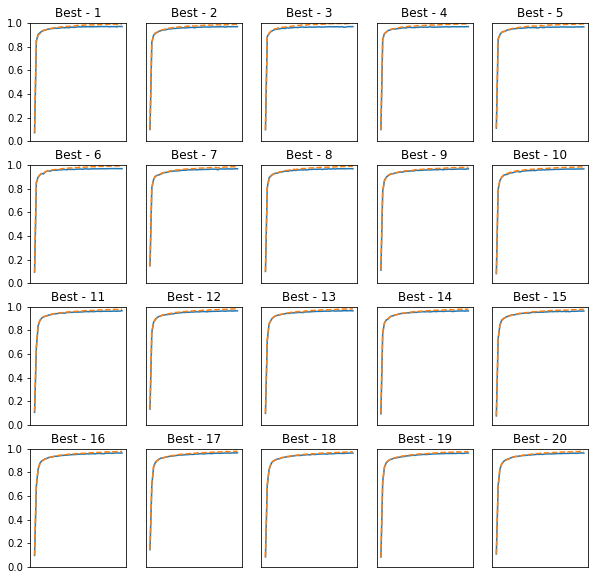

In [6]:
plt.figure(figsize=(10, 10))
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0
sorted_results = sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True)
for key, val_acc_list in sorted_results:
    print(f"Best {i + 1} (val acc : {val_acc_list[-1]:.5f}) | {key}")
    plt.subplot(row_num, col_num, i + 1)
    plt.title(f"Best - {i + 1}")
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1
    if i >= graph_draw_num:
        break
plt.show()